# Introduzione a Python

* Fate sempre riferimento alla [documentazione on-line](https://docs.python.org/3/index.html), 
* L'ambiente didattico è basato su [Jupyter](https://jupyter.org/), chi non vuole installare nulla può iniziare col [playground](https://mybinder.org/v2/gh/let-unimi/playground/master?filepath=Playground.ipynb).

## Tipi elementari, espressioni, condizionali e cicli

* interi, float (divisione intera), stringhe,
* `if` (statement e ternario) e `while`.

In [1]:
'pippo' * 2
i = 5 // 2
print('pari' if i % 2 == 0 else 'dispari')

pari


In [2]:
things = ['a', 2, 'b', 3.4]
things[2]

some_ints = {0, 1, 0}
2 in some_ints
some_ints - {0}

ch2int = {'a': 1, 'b': 2}
ch2int['a']

None

## Iterabili e comprehension

* `for` su iterabili/iteratori (es. `range`),
* `iter` e `next`,
* [comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).

In [3]:
for e in ['a',2,'pippo']: print(e, end = ' ')

for ch in 'mamma': print(ch, end = '')
print()

s = 0
for i in range(10): s += i
print(s)

a 2 pippo mamma
45


In [4]:
[2 * x for x in some_ints]

[0, 2]

In [5]:
{x // 2 for x in some_ints}

{0}

## Funzioni

* definizione e invocazione,
* funzioni come tipo di dato,
    * come argomenti, per il [visitor pattern](https://en.wikipedia.org/wiki/Visitor_pattern),
    * per costruire [dispatch table](https://en.wikipedia.org/wiki/Dispatch_table),
    * funzioni *interne* per le [chiusure lessicali](https://en.wikipedia.org/wiki/Closure_(computer_programming)),
* [decoratori](https://docs.python.org/3/reference/compound_stmts.html#function-definitions).

In [6]:
def raddoppia(x):
    return 2 * x

raddoppia(4)

8

In [7]:
func = raddoppia
func(3)

6

In [8]:
def applica(func, val):
    return func(val)

applica(raddoppia, 5)

10

In [9]:
# visitor

def visit(visitor, lst):
    for e in lst: visitor(e)
        
visit(print, [1,2,3])

1
2
3


In [10]:
# decoratori 

chiamate = 0
def conta_chiamate(f):
    def _f(x):
        global chiamate
        chiamate += 1
        ret = f(x)
        return ret
    return _f

@conta_chiamate
def sommauno(x):
    return x + 1

In [11]:
sommauno(sommauno(4))
print(chiamate)

2


In [12]:
from time import perf_counter

def calcola():
    return sum([i * i for i in range(10_000)])

def misura(func):
    t0 = perf_counter()
    func()
    t = perf_counter()
    print(t -t0)
    
misura(calcola)

def rendi_misurata(func):
    def misurata():
        misura(func)
    return misurata

@rendi_misurata
def prodotto():
    p = 1
    for n in range(10_000):
        p *= n
    return p

prodotto()

0.0013530830000000327
0.0006747609999999682


## Oggetti (not really)

10
(babbo: (figlio: (nipote)), (figlia))


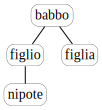

In [13]:
'pippo'.upper()

from collections import namedtuple

Merce = namedtuple('Merce', 'nome prezzo peso')
pera = Merce('pera', 10, 1)
print(pera.prezzo * pera.peso)

from liblet import Tree

t = Tree('babbo', [Tree('figlio', [Tree('nipote')]), Tree('figlia')])
print(t)
display(t)

# Tecniche di programmazione

## Ricorsione

In [14]:
def fattoriale(n):
    if n == 0: return 1
    return n * fattoriale(n-1)

fattoriale(10)

3628800

In [15]:
# cosa fanno format e nonlocal? 

def mostra_chiamate(f):
    depth = 0
    def _f(n):
        nonlocal depth
        depth += 1
        print('{}┌{}({})'.format('│' * (depth - 1), f.__name__, n))
        ret = f(n)
        print('{}└─ {}'.format('│' * (depth - 1), ret))
        depth -= 1
        return ret
    return _f

In [16]:
@mostra_chiamate
def fattoriale(n):
    if n == 0: return 1
    return n * fattoriale(n-1)

fattoriale(10)

┌fattoriale(10)
│┌fattoriale(9)
││┌fattoriale(8)
│││┌fattoriale(7)
││││┌fattoriale(6)
│││││┌fattoriale(5)
││││││┌fattoriale(4)
│││││││┌fattoriale(3)
││││││││┌fattoriale(2)
│││││││││┌fattoriale(1)
││││││││││┌fattoriale(0)
││││││││││└─ 1
│││││││││└─ 1
││││││││└─ 2
│││││││└─ 6
││││││└─ 24
│││││└─ 120
││││└─ 720
│││└─ 5040
││└─ 40320
│└─ 362880
└─ 3628800


3628800

In [17]:
@mostra_chiamate
def fibonacci(n):
    if n == 0 or n == 1: return 1
    return fibonacci(n - 1) + fibonacci(n - 2)

fibonacci(5)

┌fibonacci(5)
│┌fibonacci(4)
││┌fibonacci(3)
│││┌fibonacci(2)
││││┌fibonacci(1)
││││└─ 1
││││┌fibonacci(0)
││││└─ 1
│││└─ 2
│││┌fibonacci(1)
│││└─ 1
││└─ 3
││┌fibonacci(2)
│││┌fibonacci(1)
│││└─ 1
│││┌fibonacci(0)
│││└─ 1
││└─ 2
│└─ 5
│┌fibonacci(3)
││┌fibonacci(2)
│││┌fibonacci(1)
│││└─ 1
│││┌fibonacci(0)
│││└─ 1
││└─ 2
││┌fibonacci(1)
││└─ 1
│└─ 3
└─ 8


8

In [18]:
nested_list = [[1,2], [[3,4], 5], 6]

def recursive_visit(visitor, lst):
    for e in lst:
        if isinstance(e, list):
            recursive_visit(visitor, e)
        else:
            visitor(e)
            
recursive_visit(print, nested_list)

1
2
3
4
5
6


In [19]:
def accumulate(e):
    global tot
    tot += e

tot = 0
recursive_visit(accumulate, nested_list)
print(tot)

21


In [20]:
flat = []
recursive_visit(flat.append, nested_list)
print(flat)

[1, 2, 3, 4, 5, 6]
